In [1]:
import numpy as np
import importlib
import sys, os
import matplotlib.pyplot as plt
import time
import random
from numba import njit
sys.path.append(os.path.abspath('../../lib'))
import pairs_tensor_constructor
import pairs_tensor_util
import util
import tree_sampler_PT_to_anc
from util import compute_node_relations, convert_parents_to_adjmatrix, convert_parents_to_ancmatrix, convert_adjmatrix_to_ancmatrix
from tree_sampler import _calc_tree_llh

from common import Models, NUM_MODELS
from data_simulator_full_auto import generate_simulated_data
from tree_plotter import plot_tree
from pairs_tensor_plotter import plot_raw_scores

In [2]:
n_muts = 20
n_cells = 2000
fpr = 0.01
ado = 0.5

data, true_tree = generate_simulated_data(n_clust=n_muts, 
                                            n_cells=n_cells, 
                                            n_muts=n_muts, 
                                            FPR=fpr, 
                                            ADO=ado, 
                                            cell_alpha=1, 
                                            mut_alpha=1,
                                            drange=1
                                            )
adj_mat = true_tree[1]
anc_mat = util.convert_adjmatrix_to_ancmatrix(adj_mat)

In [3]:
pairs_tensor = pairs_tensor_constructor.construct_pairs_tensor(data,fpr,ado,1, verbose=False, ignore_coclust=True, ignore_garbage=True)

# pairs_tensor[:,:,Models.cocluster] = -np.inf

Sampling where mutation pair choice is selected at random

In [4]:
# importlib.reload(tree_sampler_PT_to_anc)

# n_samples = 1000

# samples = np.zeros((n_muts+1,n_muts+1,n_samples))
# adjs = np.zeros((n_muts+1,n_muts+1,n_samples))
# llhs = np.zeros(n_samples)
# samp_probs = np.zeros(n_samples)
# for i in range(n_samples):
#     samples[:,:,i], samp_probs[i] = tree_sampler_PT_to_anc._sample_tree(pairs_tensor)
#     adjs[:,:,i] = make_adj_from_anc(samples[:,:,i])
#     llhs[i] = _calc_tree_llh(data,samples[:,:,i], np.array([fpr]*n_muts), np.array([ado]*n_muts), 1)
# # print(util.make_ancestral_from_adj(adj_mat.astype(int)))
# # s = tree_sampler_PT_to_anc._sample_tree(pairs_tensor)

In [5]:
# #Let's see if I can figure out prob of each sample:

# def prob_sample(anc,pairs_tensor):
#     #Let's just multiply together the probabilities of each relationship
#     adj = util.make_adj_from_anc(anc)
#     node_rels = util.compute_node_relations(adj)
#     p = 0
#     for i in range(pairs_tensor.shape[0]):
#         for j in range(pairs_tensor.shape[1]):
#             p += pairs_tensor[i,j,node_rels[i+1,j+1]]
#     return p

# # prob_sample(samples[0],pairs_tensor)

# # samp_p = []
# # for samp in samples:
# #     samp_p.append(prob_sample(samp,pairs_tensor))

# unique, uni_i, uniq_cnts = np.unique(samples,axis=2, return_index=True, return_counts=True)
# uniq_p = samp_probs[uni_i]
# uniq_llhs = []
# # uniq_adjs = []
# for i in range(unique.shape[2]):
#     samp = unique[:,:,i]
#     # uniq_p.append(prob_sample(samp,pairs_tensor))
#     uniq_llhs.append(_calc_tree_llh(data, samp, np.array([fpr]*n_muts), np.array([ado]*n_muts), 1))
#     # uniq_adjs.append(make_adj_from_anc(samp))
# uniq_p = np.exp(uniq_p - np.max(uniq_p))
# uniq_p = uniq_p / np.sum(uniq_p)
# uniq_llhs = np.exp(uniq_llhs - np.max(uniq_llhs))
# uniq_llhs = uniq_llhs / np.sum(uniq_llhs)
# together = np.zeros((unique.shape[2],3))
# together[:,0] = uniq_cnts/n_samples
# together[:,1] = uniq_p
# together[:,2] = uniq_llhs
# together = np.transpose([uniq_cnts/n_samples, uniq_p, uniq_llhs])

In [6]:
# #Let's compare actual adj mat to average of sampled adj mats

# plt.figure(figsize=(8,4))
# plt.subplot(1,2,1)
# plt.imshow(adj_mat, vmin=0, vmax=1)
# plt.title("True adj")

# plt.subplot(1,2,2)
# plt.imshow(np.mean(adjs,axis=2))
# plt.title("Avg adj")

# plt.figure(figsize=(8,4))
# plt.subplot(1,2,1)
# plt.imshow(anc_mat, vmin=0, vmax=1)
# plt.title("True anc")

# plt.subplot(1,2,2)
# plt.imshow(np.mean(samples,axis=2))
# plt.title("Avg anc")


In [7]:
# llh_act = _calc_tree_llh(data, anc_mat, np.array([fpr]*n_muts), np.array([ado]*n_muts), 1)

# plt.figure(figsize=(8,8))
# h = plt.hist(llhs,np.min([int(n_samples/10), 200]))
# plt.plot([llh_act, llh_act], [0,np.max(h[0])], 'r--')
# plt.title("Sampled tree likelihoods", fontsize=15)
# plt.xlabel("LLH", fontsize=15)
# plt.ylabel("Frequency", fontsize=15)
# plt.yticks(fontsize=15)
# plt.xticks(fontsize=15)

# print(np.sum(llhs>=llh_act))

In [8]:
# p=plot_tree(adj_mat)

# sampled_adj = util.make_adj_from_anc(samples[0,:,:])
# p=plot_tree(sampled_adj)

# print(np.array_equal(sampled_adj, adj_mat))

In [9]:

# fpr = 0.001
# ado = 0.1
# n_samples = 10000
# for n_muts in [100]:
#     for n_cells in [200,500,1000,2000]:
#         seed = 1000
#         np.random.seed(seed)
#         random.seed(seed)
#         outdir = os.path.join("./","figs","nMut{}nCell{}seed{}".format(n_muts,n_cells,seed))
#         if not os.path.isdir(outdir):
#             os.makedirs(outdir)

#         data, true_tree = generate_simulated_data(n_clust=n_muts, 
#                                                     n_cells=n_cells, 
#                                                     n_muts=n_muts, 
#                                                     FPR=fpr, 
#                                                     ADO=ado, 
#                                                     cell_alpha=1, 
#                                                     mut_alpha=1,
#                                                     drange=1
#                                                     )
#         adj_mat = true_tree[1]
#         anc_mat = util.make_ancestral_from_adj(adj_mat)

#         print("Constructing pairs tensor...")
#         s = time.time()
#         pairs_tensor = pairs_tensor_constructor.construct_pairs_tensor(data,0.001,0.1,1, verbose=False)
#         pt_time = time.time() - s

#         s = time.time()
#         print("Sampling trees...")
#         samples = np.zeros((n_muts+1,n_muts+1,n_samples))
#         adjs = np.zeros((n_muts+1,n_muts+1,n_samples))
#         llhs = np.zeros(n_samples)
#         for i in range(n_samples):
#             if i % 500 ==0:
#                 print(i, "/", n_samples)
#             samples[:,:,i] = tree_sampler_PT_to_anc._sample_tree(pairs_tensor)
#         samp_time = time.time() - s
#         for i in range(n_samples):
#             adjs[:,:,i] = make_adj_from_anc(samples[:,:,i])
#             llhs[i] = _calc_tree_llh(data,samples[:,:,i], np.array([fpr]*n_muts), np.array([ado]*n_muts), 1)

#         plt.figure(figsize=(8,4))
#         plt.subplot(1,2,1)
#         plt.imshow(adj_mat, vmin=0, vmax=1)
#         plt.title("True adj")
#         plt.subplot(1,2,2)
#         plt.imshow(np.mean(adjs,axis=2))
#         plt.title("Avg adj")
#         plt.savefig(os.path.join(outdir, "adj_comp.png"))

#         plt.figure(figsize=(8,4))
#         plt.subplot(1,2,1)
#         plt.imshow(anc_mat, vmin=0, vmax=1)
#         plt.title("True anc")
#         plt.subplot(1,2,2)
#         plt.imshow(np.mean(samples,axis=2))
#         plt.title("Avg anc")
#         plt.savefig(os.path.join(outdir, "anc_comp.png"))

#         llh_act = _calc_tree_llh(data, anc_mat, np.array([fpr]*n_muts), np.array([ado]*n_muts), 1)

#         plt.figure(figsize=(8,8))
#         h = plt.hist(llhs,int(n_samples/10))
#         plt.plot([llh_act, llh_act], [0,np.max(h[0])], 'r--')
#         plt.savefig(os.path.join(outdir, "llhs.png"))

#         with open(os.path.join(outdir,"times.txt"), 'w') as f:
#             f.write("Pairs Tensor:\t{}\n".format(pt_time))
#             f.write("Sampling:\t{}\n".format(samp_time))


In [10]:
# A = np.array([
#     [1, 0 ,0 ,0],
#     [1, 1, 0, 0],
#     [1, 1 ,1, 0],
#     [1, 1, 0, 1]
#     ])

# s_r = np.sum(A,axis=0) #How many mutations appear in each clone
# s_c = np.sum(A,axis=1) #How many clones have that mutation

# F = A @ A.T #How many mutations from clone i appear in clone j

# print(A)
# print(s_r)
# print(s_c)
# print(F)

# for i in range(4):
#     for j in range(4):
#         assert np.sum(F[i,j] == s_r[j]) == s_c[j]

In [11]:
# def get_i_rels(anc,i,j):
#     n_mut = anc.shape[0] - 1
#     is_not_i_j = (np.arange(n_mut) != i) & (np.arange(n_mut) != j)
#     anc_i = np.argwhere((anc[1:,i+1].flatten() == 1) & (anc[1:,j+1].flatten() == -1) & is_not_i_j)
#     dec_i = np.argwhere((anc[i+1,1:].flatten() == 1) & (anc[1:,j+1].flatten() == -1) & is_not_i_j)
#     brn_i = np.argwhere((anc[i+1,1:].flatten() == 0) & (anc[1:,i+1].flatten() == 0) & (anc[1:,j+1].flatten() == -1) & is_not_i_j)

#     return anc_i,dec_i,brn_i

In [12]:
# from util import make_adj_from_anc


# anc = np.array([
#     [1,  1,  1,  1,  1,  1],
#     [0,  1,  1,  1,  1,  1],
#     [0,  0,  1,  0,  0, -1],
#     [0,  0,  0,  1,  1, -1],
#     [0,  0,  0,  0,  1, -1],
#     [0,  0, -1, -1, -1,  1]
# ]
# )
# adj = make_adj_from_anc(anc)
# # plot_tree(adj)
# get_i_rels(anc, 0, 3)

In [13]:
# importlib.reload(tree_sampler_PT_to_anc)
# #Unit test the _propogate_rules function
# #   Looks like it got them all right! Now... to figure out why it's breaking anyways...
# tens = np.ones((3,3,5)) / 3
# tens[:,:,0:2] = 0
# tens[range(3),range(3),:] = 0

# print(tens[:,:,:])

# anc = np.array([
#     [ 1,  1,  1,  1],
#     [ 0,  1, -1, -1],
#     [ 0, -1,  1, -1],
#     [ 0, -1, -1,  1]
# ])
# i,j,k = 1,2,3
# for ij in [1,0]:
#     for jk, kj in [[1,0], [0,0], [0,1]]:
#         no_prop_anc = np.copy(anc)
#         no_prop_anc[j,k] = jk
#         no_prop_anc[k,j] = kj
#         prop_anc = np.copy(no_prop_anc)
#         no_prop_anc[i,j] = ij
#         no_prop_anc[j,i] = 0
#         rel = Models.diff_branches - ij*2 #techincally...
#         model_probs = np.copy(tens)
#         model_probs[j-1,k-1,:] = 0
#         model_probs[k-1,j-1,:] = 0
#         tree_sampler_PT_to_anc._propogate_rules(prop_anc,i-1,j-1,rel,model_probs)
#         print(no_prop_anc[1:,1:])
#         print(prop_anc[1:,1:])
#         print(model_probs[:,:,2:])
#     for ik, ki in [[1,0], [0,0], [0,1]]:
#         no_prop_anc = np.copy(anc)
#         no_prop_anc[i,k] = ik
#         no_prop_anc[k,i] = ki
#         prop_anc = np.copy(no_prop_anc)
#         no_prop_anc[i,j] = ij
#         no_prop_anc[j,i] = 0
#         rel = Models.diff_branches - ij*2 #techincally...
#         model_probs = np.copy(tens)
#         model_probs[i-1,k-1,:] = 0
#         model_probs[k-1,i-1,:] = 0
#         tree_sampler_PT_to_anc._propogate_rules(prop_anc,i-1,j-1,rel,model_probs)
#         print(no_prop_anc[1:,1:])
#         print(prop_anc[1:,1:])
#         print(model_probs[:,:,2:])

In [14]:
#IMPLEMENTING SAMPLING RELATIONSHIPS ALONG A SET PAIRS ORDER
# importlib.reload(tree_sampler_PT_to_anc)
# from tree_sampler_PT_to_anc import _sample_tree_w_pair_order

# n_samples = 10000

# cont_samp = True
# if cont_samp:
#     new_samples = np.copy(samples)
#     new_adjs = np.copy(adjs)
#     new_llhs = np.copy(llhs)
#     new_samp_probs = np.copy(samp_probs)

# samples = np.zeros((n_muts+1,n_muts+1,n_samples))
# adjs = np.zeros((n_muts+1,n_muts+1,n_samples))
# llhs = np.zeros(n_samples)
# samp_probs = np.zeros(n_samples)
# for i in range(n_samples):
#     if i % int(n_samples/20) == 0:
#         print(i, "/", n_samples)
#     samples[:,:,i], samp_probs[i] = _sample_tree_w_pair_order(pairs_tensor, order_by_certainty=True)
#     adjs[:,:,i] = make_adj_from_anc(samples[:,:,i])
#     llhs[i] = _calc_tree_llh(data,samples[:,:,i], np.array([fpr]*n_muts), np.array([ado]*n_muts), 1)

# if cont_samp:
#     samples = np.append(new_samples,samples,axis=2)
#     adjs = np.append(new_adjs,adjs,axis=2)
#     llhs = np.append(new_llhs,llhs)
#     samp_probs = np.append(new_samp_probs,samp_probs)

In [30]:
importlib.reload(tree_sampler_PT_to_anc)
# from tree_sampler_PT_to_anc import _sample_tree_w_pair_order
from tree_sampler_PT_to_anc import sample_trees
import tree_sampler
importlib.reload(tree_sampler)
from tree_sampler import _calc_tree_llh


_ = tree_sampler_PT_to_anc.sample_trees(pairs_tensor, 1, order_by_certainty=True, parallel=8)

n_samples = 1000
cont_sampling = False
if cont_sampling:
    try:
        new_samples, new_samp_probs = tree_sampler_PT_to_anc.sample_trees(pairs_tensor, n_samples, order_by_certainty=True, parallel=8)
        samples = np.append(samples, new_samples, axis=0)
        samp_probs = np.append(samp_probs, new_new_samples, axis=0)
        n_samples += n_samples
    except NameError:
        samples, samp_probs = tree_sampler_PT_to_anc.sample_trees(pairs_tensor, n_samples, order_by_certainty=True, parallel=8)
else:
    samples, samp_probs = tree_sampler_PT_to_anc.sample_trees(pairs_tensor, n_samples, order_by_certainty=True, parallel=8)
adjs = np.zeros((n_samples,n_muts+1,n_muts+1), dtype=np.int8)
ancs = np.zeros((n_samples,n_muts+1,n_muts+1), dtype=np.int8)
llhs = np.zeros(n_samples)
for i in range(n_samples):
    if i % int(n_samples/20) == 0:
        print(i, "/", n_samples)
    adjs[i,:,:] = convert_parents_to_adjmatrix(samples[i,:])
    ancs[i,:,:] = convert_adjmatrix_to_ancmatrix(adjs[i,:,:])
    llhs[i] = _calc_tree_llh(data, ancs[i,:,:], np.array([fpr]*n_muts), np.array([ado]*n_muts), 1)


{"desc": "Sampling trees", "count": 0, "total": 1, "unit": "tree", "started_at": "2022-11-10 11:30:46.336997", "timestamp": "2022-11-10 11:30:46.337015"}
{"desc": "Sampling trees", "count": 1, "total": 1, "unit": "tree", "started_at": "2022-11-10 11:30:46.336997", "timestamp": "2022-11-10 11:30:50.846169"}
{"desc": "Sampling trees", "count": 0, "total": 1000, "unit": "tree", "started_at": "2022-11-10 11:30:51.011849", "timestamp": "2022-11-10 11:30:51.011868"}
{"desc": "Sampling trees", "count": 1, "total": 1000, "unit": "tree", "started_at": "2022-11-10 11:30:51.011849", "timestamp": "2022-11-10 11:30:51.046214"}
{"desc": "Sampling trees", "count": 1000, "total": 1000, "unit": "tree", "started_at": "2022-11-10 11:30:51.011849", "timestamp": "2022-11-10 11:30:53.397437"}


0 / 1000
50 / 1000
100 / 1000
150 / 1000
200 / 1000
250 / 1000
300 / 1000
350 / 1000
400 / 1000
450 / 1000
500 / 1000
550 / 1000
600 / 1000
650 / 1000
700 / 1000
750 / 1000
800 / 1000
850 / 1000
900 / 1000
950 / 1000


In [31]:
# C = 1/np.mean(llhs/samp_probs) #Wrong me thinks (forgot both vals are logged...)
nlogC = -np.log(n_samples) + util.logsumexp(llhs - samp_probs)

Sample coverage of g(t): 0.9076635548909404
Sample coverage of tree_post 0.8755220948504041
# trees >= actual tree llh 227


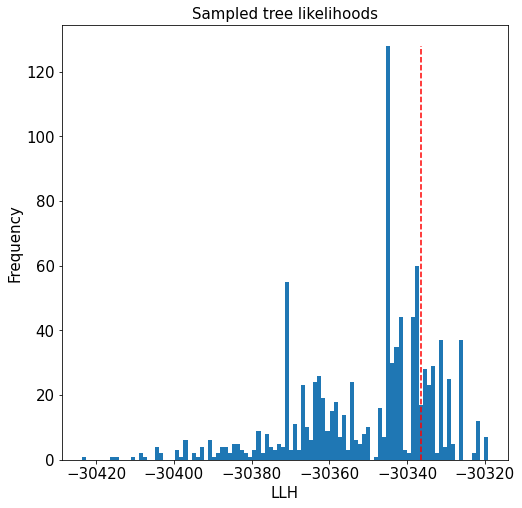

In [32]:
unique, uni_i, uniq_cnts = np.unique(samples,axis=0, return_index=True, return_counts=True)
uniq_p = samp_probs[uni_i]
uniq_llhs = llhs[uni_i]
# uniq_llhs = []
# # uniq_adjs = []
# for i in range(unique.shape[2]):
#     samp = unique[:,:,i]
    # uniq_p.append(prob_sample(samp,pairs_tensor))
    # uniq_llhs.append(_calc_tree_llh(data, samp, np.array([fpr]*n_muts), np.array([ado]*n_muts), 1))
    # uniq_adjs.append(make_adj_from_anc(samp))
print("Sample coverage of g(t):",np.sum(np.exp(uniq_p-np.max(uniq_p))*np.max(np.exp(uniq_p))))
uniq_p = np.exp(uniq_p)
# uniq_p = uniq_p / np.sum(uniq_p)
uniq_post = uniq_llhs - nlogC
print("Sample coverage of tree_post",np.sum(np.exp(uniq_post - np.max(uniq_post))*np.exp(np.max(uniq_post))))
uniq_llhs = np.exp(uniq_llhs - np.max(uniq_llhs))
uniq_llhs = uniq_llhs / np.sum(uniq_llhs)
together = np.zeros((unique.shape[0],4))
together[:,0] = uniq_cnts/n_samples #sample prob approx from sampling
together[:,1] = uniq_p #sample prob from edge weights
together[:,2] = uniq_llhs #tree llhs as calculated by old method
together[:,3] = np.exp(uniq_post - np.max(uniq_post))*np.exp(np.max(uniq_post)) #posterior calculated using normalization factor estimated from sampling


# plt.figure(figsize=(8,4))
# plt.subplot(1,2,1)
# plt.imshow(adj_mat, vmin=0, vmax=1)
# plt.title("True adj")

# plt.subplot(1,2,2)
# plt.imshow(np.mean(adjs,axis=0))
# plt.title("Avg adj")

# plt.figure(figsize=(8,4))
# plt.subplot(1,2,1)
# plt.imshow(anc_mat, vmin=0, vmax=1)
# plt.title("True anc")

# plt.subplot(1,2,2)
# plt.imshow(np.mean(ancs,axis=0))
# plt.title("Avg anc")


llh_act = _calc_tree_llh(data, anc_mat, np.array([fpr]*n_muts), np.array([ado]*n_muts), 1)

plt.figure(figsize=(8,8))
h = plt.hist(llhs,np.min([int(n_samples/10), 200]))
plt.plot([llh_act, llh_act], [0,np.max(h[0])], 'r--')
plt.title("Sampled tree likelihoods", fontsize=15)
plt.xlabel("LLH", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

print("# trees >= actual tree llh", np.sum(llhs>=llh_act))

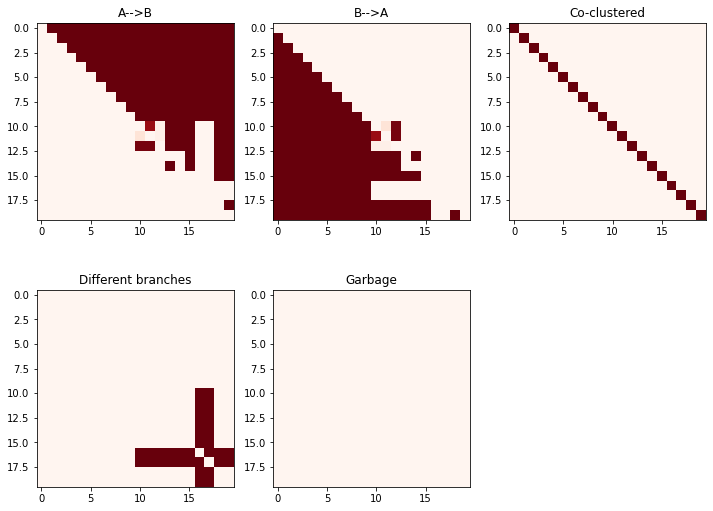

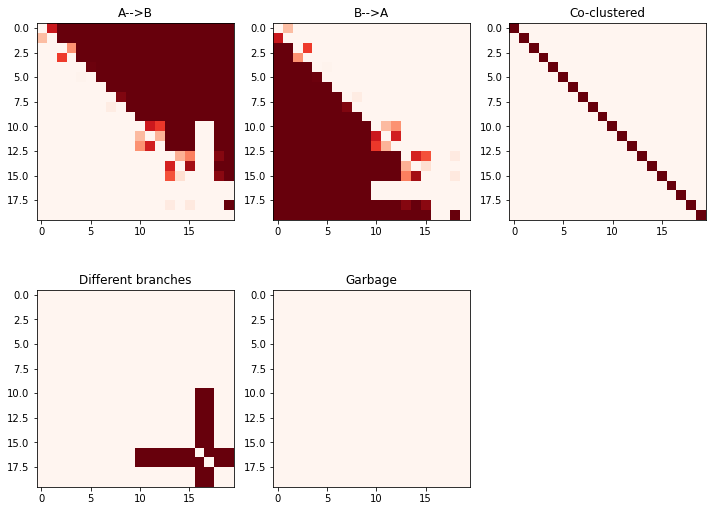

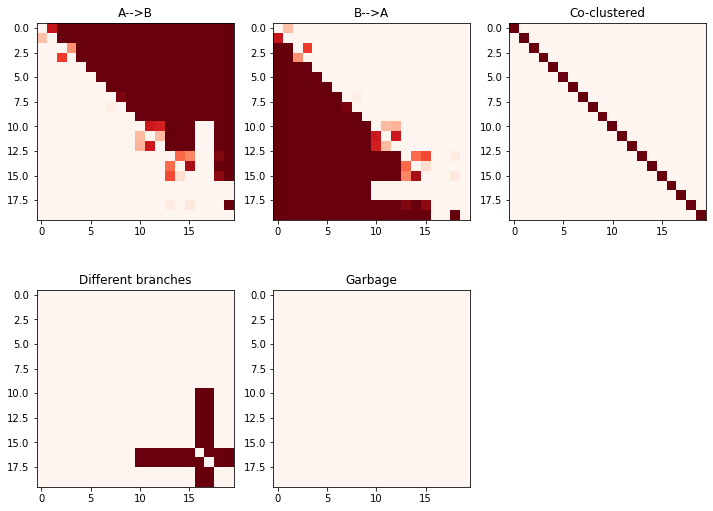

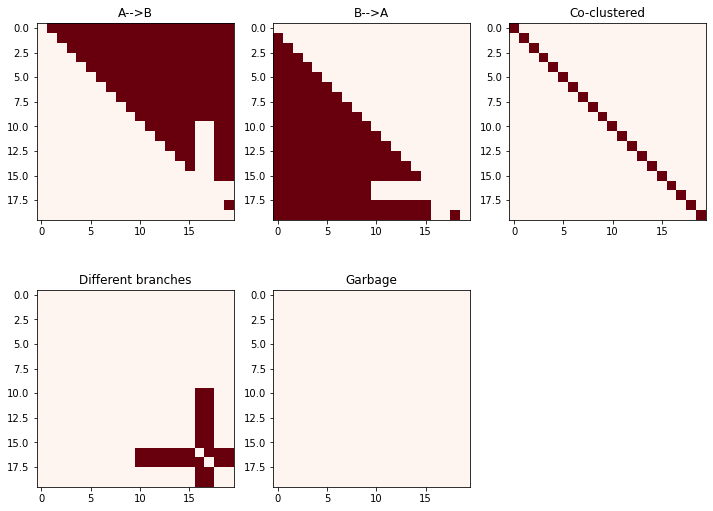

In [33]:
importlib.reload(tree_sampler_PT_to_anc)
import pairs_tensor_plotter
importlib.reload(pairs_tensor_plotter)
from pairs_tensor_plotter import plot_raw_scores
# tree_sampler_PT_to_anc.calc_importance_sampling_pairs_tensor(samples,llhs,samp_probs)
new_pairs_tens = tree_sampler_PT_to_anc.calc_importance_sampling_pairs_tensor(samples,llhs,samp_probs)

#The importance sampling tensor
plot_raw_scores(new_pairs_tens,show_fig=True,save_fig=False)

#The dumb average sampled pairs tensor
sample_avg_pairs_tensor = np.zeros((n_muts,n_muts,NUM_MODELS))
for s in range(n_samples):
    node_rels = compute_node_relations(adjs[s,:,:])
    for i in range(n_muts):
        for j in range(n_muts):
            sample_avg_pairs_tensor[i,j,node_rels[i+1,j+1]] += 1
plot_raw_scores(sample_avg_pairs_tensor/n_samples,show_fig=True,save_fig=False)

#The initial estimated pairs tensor
plot_raw_scores(np.exp(pairs_tensor),show_fig=True,save_fig=False)

#The actual pair tensor
node_rels = compute_node_relations(adj_mat)
act_pairs_tensor = np.zeros((n_muts,n_muts,NUM_MODELS))
for i in range(n_muts):
    for j in range(n_muts):
        act_pairs_tensor[i,j,node_rels[i+1,j+1]] = 1

plot_raw_scores(act_pairs_tensor,show_fig=True,save_fig=False)


Text(0.5, 1.0, 'Importance sampling anc mat')

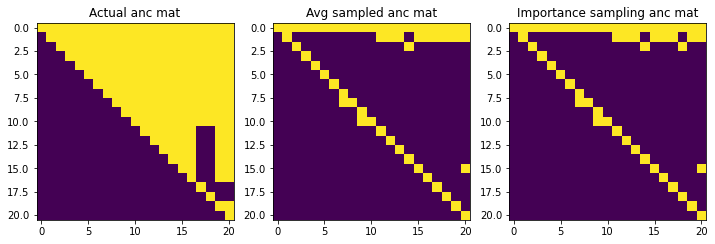

In [20]:
importlib.reload(tree_sampler_PT_to_anc)


IS_anc_mat = tree_sampler_PT_to_anc.calc_importance_sampling_matrix(ancs,llhs,samp_probs)
dum_anc_mat = np.mean(ancs,axis=0)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(anc_mat)
plt.title("Actual anc mat")

plt.subplot(1,3,2)
plt.imshow(dum_anc_mat)
plt.title("Avg sampled anc mat")

plt.subplot(1,3,3)
plt.imshow(IS_anc_mat)
plt.title("Importance sampling anc mat")


Text(0.5, 1.0, 'Importance sampling adj mat')

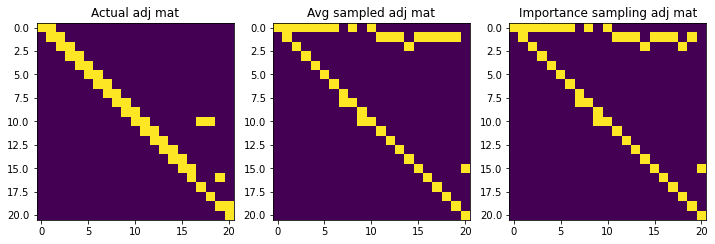

In [21]:
importlib.reload(tree_sampler_PT_to_anc)


IS_adj_mat = tree_sampler_PT_to_anc.calc_importance_sampling_matrix(adjs,llhs,samp_probs)
dum_adj_mat = np.mean(adjs,axis=0)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(adj_mat)
plt.title("Actual adj mat")

plt.subplot(1,3,2)
plt.imshow(dum_adj_mat)
plt.title("Avg sampled adj mat")

plt.subplot(1,3,3)
plt.imshow(IS_adj_mat)
plt.title("Importance sampling adj mat")

In [22]:
#Trying to figure out how the normalization constant changes during sampling.

# g_cov = np.zeros(n_samples)
# post_cov = np.zeros(n_samples)
# unique = np.zeros((1,n_muts+1,n_muts+1))
# unique[0,:,:] = samples[0,:,:]
# uni_i = np.zeros(1,dtype=np.int)
# for s in range(n_samples):
#     if s % int(n_samples/20) == 0:
#         print(s, "/", n_samples)
#     new_unique = np.append(unique, samples[s:s+1,:,:],axis=0)
#     new_unique = np.unique(new_unique,axis=0)
#     if unique.shape != new_unique.shape:
#         unique = new_unique
#         uni_i = np.append(uni_i, s)
#     # unique, uni_i, uniq_cnts = np.unique(samples[:s,:,:],axis=0, return_index=True, return_counts=True)
#     nlogC = -np.log(s) + util.logsumexp(llhs[:s+1] - samp_probs[:s+1])
#     uniq_p = samp_probs[uni_i]
#     uniq_llhs = llhs[uni_i]
#     # uniq_p = np.exp(uniq_p)
#     uniq_post = uniq_llhs - nlogC

#     g_cov[s] = np.sum(np.exp(uniq_p-np.max(uniq_p))*np.max(np.exp(uniq_p)))
#     post_cov[s] = np.sum(np.exp(uniq_post - np.max(uniq_post))*np.exp(np.max(uniq_post)))


In [ ]:
plt.figure()
plt.plot(g_cov, 'r')
plt.plot(post_cov, 'b')
# plt.ylim([0.8,1.2])

In [ ]:
rng_i = np.zeros(n_muts*n_muts,dtype=int)
rng_j = np.zeros(n_muts*n_muts,dtype=int)
cnt = 0
for i in range(n_muts):
    for j in range(n_muts):
        rng_i[cnt] = i
        rng_j[cnt] = j
        cnt += 1 

t_i = [i for i in range(n_muts) for j in range(n_muts)]
t_j = [j for i in range(n_muts) for j in range(n_muts)]

t = np.array([[i,j] for i in range(n_muts) for j in range(n_muts)])
t_i, t_j = t[:,0], t[:,1]

print(np.array_equal(rng_i, t_i))
print(np.array_equal(rng_j, t_j))